# 图像特效-色彩特效

In [28]:
from scipy import signal
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [29]:
src = cv2.imread('../datas/f2.jpg')
gray = cv2.imread('../datas/f2.jpg',0)
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)

In [38]:
# 暗绿色
def dark_green(src):
    srcf = np.float32(src)
    dst = np.zeros_like(srcf)
    
    r,g,b = srcf[:,:,0],srcf[:,:,1],srcf[:,:,2]
    dst[:,:,0] = (g - b) ** 2/ 128.0
    dst[:,:,1] = (r - b) ** 2 / 128.0
    dst[:,:,2] = (r - g) ** 2 / 128.0

    dst[dst < 0] = 0
    dst[dst > 255] = 255
    
    return np.uint8(dst)
    

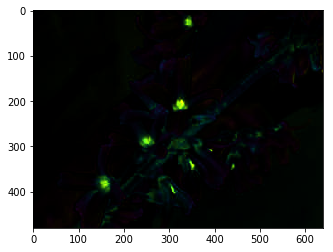

In [39]:
dst = dark_green(rgb)
plt.imshow(dst)

In [40]:
# 冰冻效果
def ice(src):
    srcf = np.float32(src)
    dst = np.zeros_like(srcf)
    r,g,b = srcf[:,:,0],srcf[:,:,1],srcf[:,:,2]
    dst[:,:,0] = np.abs(r - g - b) * 3.0 / 2.0
    dst[:,:,1] = np.abs(g - b - r) * 3.0 / 2.0
    dst[:,:,2] = np.abs(b - r - g) * 3.0 / 2.0
    dst[dst > 255] = 255
    return np.uint8(dst)

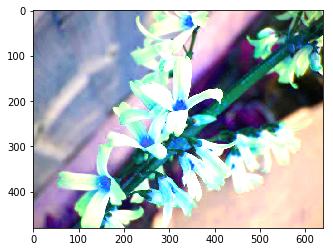

In [41]:
dst = ice(rgb)
plt.imshow(dst)

In [42]:
# 熔铸效果
def casting(src):
    srcf = np.float32(src)
    dst = np.zeros_like(srcf)
    r,g,b = srcf[:,:,0],srcf[:,:,1],srcf[:,:,2]
    eps = 1.0e-5
    dst[:,:,0] = r * 128 / (g + b + eps)
    dst[:,:,1] = g * 128 / (b + r + eps)
    dst[:,:,2] = b * 128 / (r + b + eps)
    dst[dst > 255] = 255
    return np.uint8(dst)

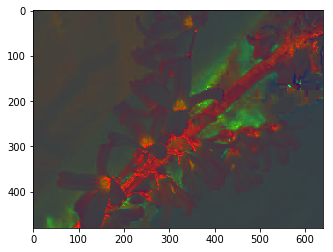

In [43]:
dst = casting(rgb)
plt.imshow(dst)

In [44]:
def darkness(src):
    srcf = np.float32(src)
    dst = np.zeros_like(srcf)
    r,g,b = srcf[:,:,0],srcf[:,:,1],srcf[:,:,2]
    dst[:,:,0] = r * r / 255.0
    dst[:,:,1] = g * g / 255.0
    dst[:,:,2] = b * b / 255.0
    dst[dst > 255] = 255
    return np.uint8(dst)

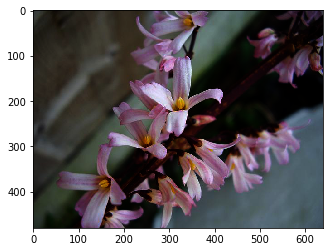

In [45]:
dst = darkness(rgb)
plt.imshow(dst)

In [46]:
# 色彩通道变换
def rotation_channel(src):
    srcf = np.float32(src)
    dst = np.zeros_like(srcf)
    r,g,b = srcf[:,:,0],srcf[:,:,1],srcf[:,:,2]
    dst[:,:,0] = g * b / 255.0
    dst[:,:,1] = r * b / 255.0
    dst[:,:,2] = r * g / 255.0
    dst[dst > 255] = 255
    return np.uint8(dst)

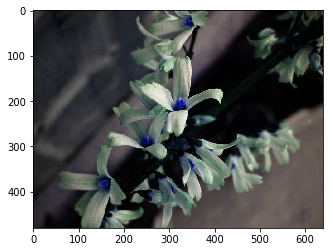

In [47]:
dst = rotation_channel(rgb)
plt.imshow(dst)

In [48]:
# 染色效果
def  colouration(src):
    srcf = np.float32(src)
    dst = np.zeros_like(srcf)
    #r,g,b = srcf[:,:,0],srcf[:,:,1],srcf[:,:,2]
    gray = cv2.cvtColor(src,cv2.COLOR_RGB2GRAY).astype(np.float32)
    gray = cv2.cvtColor(gray,cv2.COLOR_GRAY2RGB).astype(np.float32)
    dst = src * gray / 255.0
    dst[dst > 255] = 255
    return np.uint8(dst)

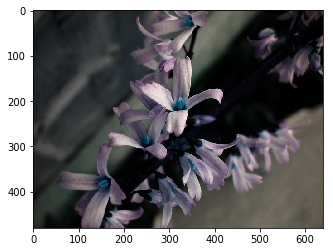

In [49]:
dst = colouration(src)
plt.imshow(dst)

In [50]:
# 棕褐色效果(老照片效果)
def brown(src):
    srcf = np.float32(src)
    dst = np.zeros_like(srcf)
    r,g,b = srcf[:,:,0],srcf[:,:,1],srcf[:,:,2]
    dst[:,:,0] = 0.393 * r + 0.769 * g + 0.189 * b
    dst[:,:,1] = 0.349 * r + 0.686 * g + 0.168 * b
    dst[:,:,2] = 0.272 * r + 0.534 * g + 0.131 * b
    dst[dst > 255] = 255
    return np.uint8(dst)

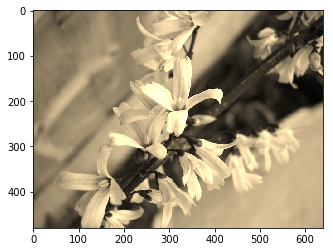

In [51]:
dst = brown(rgb)
plt.imshow(dst)